In [1]:
from collections import defaultdict

import pandas as pd

import networkx as nx

import nxviz as nv
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def get_poem_nodes(G):
    nodes_map = defaultdict(list)

    # This gives us all nodes associated all poems
    for n, d in G.nodes(data=True):
        if d['vector_ind'] >= 0:
            nodes_map[d['vector_ind']].append(n)

    return nodes_map

In [3]:
def create_subgraph_with_similarity_score(G, v_1_nodes, v_2_nodes, type_attrs):
    # starts at 0, will ultimately normalize this after all have been calculated
    similarity_score = 0

    # for reference in the logic
    same_terms = set()
    common_syns = set()

    history = list()
    # Now we want the set of synonyms connecting the two poems.
    for node_1 in v_1_nodes:
        for node_2 in v_2_nodes:
            index = [min([node_1, node_2]), max(node_1, node_2)]

            # so we don't risk duplication in scoring.
            if index not in history:
                history.append(index)

                n1_term = G.nodes[node_1]['term_id']
                n2_term = G.nodes[node_2]['term_id']

                # Determine if connected
                if n1_term == n2_term:
                    if n1_term not in same_terms:
                        same_terms.add(n1_term)

                        similarity_score += (G.nodes[node_1]['tf-idf'] + G.nodes[node_2]['tf-idf'])

                else:
                    # synonym matching
                    neighbors = [neighbor_ind for neighbor_ind in nx.common_neighbors(G, node_1, node_2) 
                                 if type_attrs[neighbor_ind] == 'SYN']

                    for neighbor_ind in neighbors:
                        common_syns.add(neighbor_ind)

                        similarity_score += (G.nodes[node_1]['tf-idf'] + G.nodes[node_2]['tf-idf']) / (len(neighbors) * 2)

    return G.subgraph(v_1_nodes + v_2_nodes + list(common_syns)), similarity_score

In [4]:
graph = nx.read_gpickle("../data/final_network.gpickle")

In [5]:
graph.nodes[0]

{'vector_ind': 0,
 'term_id': 11,
 'freq_per_doc': 2.0,
 'type': 'SPA',
 'tf-idf': 0.06357624050152534,
 'doc_name': 'The Hill'}

In [10]:
type_attrs = nx.get_node_attributes(graph, 'type')

similarities_matrix = pd.DataFrame(columns=list(range(246)))
subgraph_map = dict()

nodes_map = get_poem_nodes(graph)

# This is a lot. But, I need it to create my matrix
# for i in range(246):
i = 0
print(f"{i} out of 246: {i / 246}%")
similarities_row = list()
for j in range(246):
    if i == j:
        print(f"Match found: {i}")
        similarities_row.append(1)

    else:
        poems_index = (min([i, j]), max([i, j]))
        if poems_index in subgraph_map:
            print(f"Score and subgraph already calculated: {i, j}")
            similarity_matrix.append(subgraph_map[poems_index]['similarity_score'])

        else:
            poem_1_nodes, poem_2_nodes = nodes_map[i], nodes_map[j]
            if not poem_1_nodes or not poem_2_nodes:
                raise Exception('Something fishy with your nodes. \n1: {poem_1_nodes}\n2: {poem_2_nodes}')

            subgraph, similarity_score = create_subgraph_with_similarity_score(
                graph,
                poem_1_nodes,
                poem_2_nodes,
                type_attrs
            )

            subgraph_map[poems_index] = {
                'subgraph': subgraph,
                'similarity_score': similarity_score
            }

            print(j)

0 out of 246: 0.0%
Match found: 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245


In [14]:
subgraph_map

{(0, 1): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084ef0>,
  'similarity_score': 1.7670986798820574,
  'poem_1_title': 'The Hill',
  'poem_2_title': 'Hod Putt'},
 (0, 2): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084fd0>,
  'similarity_score': 2.055712784256685,
  'poem_1_title': 'The Hill',
  'poem_2_title': 'Ollie McGee'},
 (0, 3): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084d68>,
  'similarity_score': 2.0162324565341283,
  'poem_1_title': 'The Hill',
  'poem_2_title': 'Fletcher McGee'},
 (0, 4): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084c88>,
  'similarity_score': 1.189769180568688,
  'poem_1_title': 'The Hill',
  'poem_2_title': 'Robert Fulton Tanner'},
 (0, 5): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084ba8>,
  'similarity_score': 0.5972034527099296,
  'poem_1_title': 'The Hill',
  'poem_2_title': 'Cassius Hueffer'},
 (0, 6): {'subgraph': <networkx.classes.graphviews.SubGraph at 0x10c084ac8

In [15]:
def draw_circos_plot(ind_1, ind_2):
    ap = nv.CircosPlot(
        subgraph_map[(ind_1, ind_2)]['subgraph'], 
        node_color='vector_ind', 
        node_order='vector_ind', 
        node_grouping='doc_name', 
        group_label_position='middle',
        group_label_color=True,
        figsize=(8, 8)
    )

    ap.draw()
    plt.title(f"Similarity Score: {subgraph_map[(ind_1, ind_2)]['similarity_score']}");

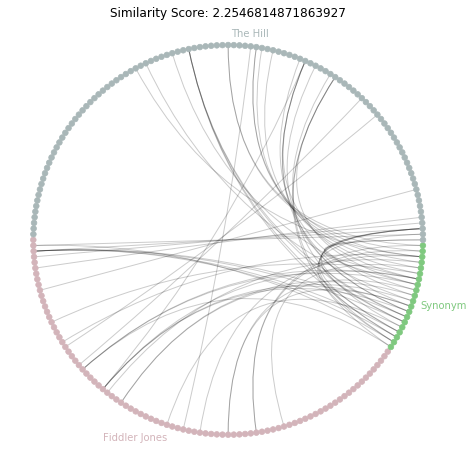

In [23]:
draw_circos_plot(0, 59)

In [ ]:
similarities_matrix.to_pickle('')